David Treviño Camarillo 624996
Tarea A1.3 Regresión Lineal Múltiple

Importa los datos del archivo “NASA.csv” a tu ambiente de trabajo. Este archivo lo
encontrarás en la misma página donde descargaste esta plantilla. Revisa las dimensiones
del data frame e imprime en consola tanto dichas dimensiones como las primeras 15 filas
de datos.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

data=pd.read_csv("A1.3 NASA.csv")

print("Dimensiones: ", data.shape, "\n")

data.head(15)

Dimensiones:  (1503, 6) 



frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500     0.0    0.3048       55.5  0.002831  126.416

Separa el data frame en datos de entrenamiento y datos de prueba con una proporción
70/30. Es decir, el 70% de los datos se usarán para entrenar el modelo y el resto para
validar sus resultados. Asegúrate que la partición sea aleatoria, no es una buena práctica
simplemente tomar las primeras observaciones para entrenar y las últimas para probar.
Imprime en pantalla las dimensiones de ambos conjuntos de datos. Revisa y asegúrate
que la cantidad de observaciones de ambos conjuntos de datos sumen a la cantidad de
datos original.

In [32]:
train, test = train_test_split(data, test_size=0.3)

print("Total Datos: ", train.shape[0] + test.shape[0])

Total Datos:  1503


Entrena un modelo de regresión lineal múltiple, para que las primeras 5 variables del
sistema intenten predecir a la sexta, “presion”. Es decir, nos interesa tratar de predecir
el aerodinamismo, medido como la presión sonora detectada. Imprime en pantalla un
resumen del modelo, donde se muestre claramente el coeficiente estimado de cada
variable, así como su p-value asociado, entre otras cosas. Es probable que los p-values
se vean como 0.000, en ese caso, imprimir manualmente los valores exactos de dichas
métricas (recuerda el atributo `pvalues`).


In [33]:
x=train.iloc[:, :5]
y=train.iloc[:, 5]

x=sm.add_constant(x)

modelo = sm.OLS(y, x).fit()

print(modelo.summary(), "\n")

print("\nP-values exactos:")
print(modelo.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.74e-164
Time:                        16:54:03   Log-Likelihood:                -3144.4
No. Observations:                1052   AIC:                             6301.
Df Residuals:                    1046   BIC:                             6331.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.7779      0.638    208.190      0.0

A partir de los resultados mostrados en la tabla, indica si consideras que existe al menos
una variable significativa en el modelo. Adicionalmente, indica específicamente cuál o
cuáles variables específicas tienen una asociación lineal significativa con la salida y cuál
considerarías que es la variable más importante del modelo. Imprime en consola cada
una de estas aseveraciones como texto, pero indica claramente en qué métrica te estás
basando para llegar a cada conclusión.

In [24]:
p_values = modelo.pvalues
coeficientes = modelo.params.abs()

variables_significativas = p_values[p_values < 0.05].index.tolist()

variable_mas_importante = coeficientes.idxmax()

# Imprimir conclusiones
if len(variables_significativas) > 0:
    print(f"Existen variables significativas en el modelo, basándonos en p-values < 0.05.")
    print(f"Las variables con una asociación lineal significativa con 'presión' son: {variables_significativas}.")
else:
    print("No hay evidencia suficiente para afirmar que alguna variable sea estadísticamente significativa (p-value < 0.05).")

print(f"La variable más importante en el modelo, basándonos en el coeficiente absoluto más alto, es: {variable_mas_importante}.")

Existen variables significativas en el modelo, basándonos en p-values < 0.05.
Las variables con una asociación lineal significativa con 'presión' son: ['const', 'frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor'].
La variable más importante en el modelo, basándonos en el coeficiente absoluto más alto, es: espesor.


Calcula el residual standard error y la 𝑅^2 del modelo, tanto para los datos de
entrenamiento como para los datos de validación e imprime dichos valores en la consola.
Para el cálculo de las métricas en el conjunto de entrenamiento, te recomiendo usar los
atributos ‘scale’ (y sacar la raíz cuadrada) y ‘rsquared’.

In [28]:
print("Entrenamiento R^2: ", modelo.rsquared)
print("Entrenamiento RSE: ", np.sqrt(modelo.scale))

a=test.iloc[:, :5]
b=test.iloc[:, 5]

a = sm.add_constant(a)
pred = modelo.predict(a)

print("\nTest R^2: ", r2_score(b, pred))
print("Test RSE: ", np.sqrt(mean_squared_error(b, pred)))

Entrenamiento R^2:  0.5061841995583873
Entrenamiento RSE:  4.691485603306988

Test R^2:  0.5303924365645689
Test RSE:  5.08264761438955


Finalmente, tratemos de visualizar los resultados obtenidos. Genera una gráfica de
dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos
de validación en el eje x, y que cuente con el valor estimado de Y, de acuerdo al modelo,
para el mismo conjunto de datos en el eje y. Idealmente, si el modelo fuera perfecto, se
tendría una línea recta con una pendiente de 1 (45 grados), pues el valor real y el valor
estimado serían idénticos. Esta es una manera cualitativa de evaluar la calidad de nuestro
modelo, entre más se asemejen los puntos a una línea recta, mejor. Comenta sobre los
resultados obtenidos.

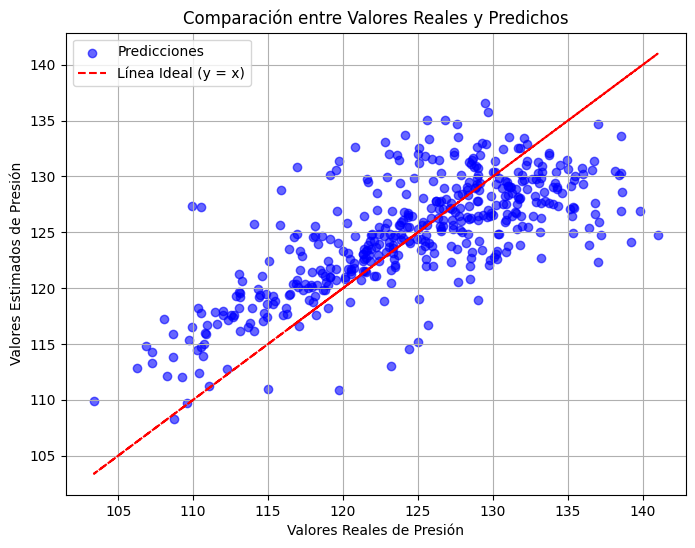

In [30]:
# Crear la gráfica de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(b, pred, color='blue', alpha=0.6, label="Predicciones")
plt.plot(b, b, color='red', linestyle='--', label="Línea Ideal (y = x)")

# Etiquetas y título
plt.xlabel("Valores Reales de Presión")
plt.ylabel("Valores Estimados de Presión")
plt.title("Comparación entre Valores Reales y Predichos")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

A partir de la gráfica, se pueden hacer las siguientes observaciones sobre el desempeño del modelo de regresión lineal múltiple:

Tendencia general correcta:
La mayoría de los puntos siguen una distribución cercana a la línea roja y=x, lo que indica que el modelo captura correctamente la relación entre las variables predictoras y la variable objetivo.

Desviaciones y dispersión:
Aunque hay una alineación general, también se observa dispersión significativa en algunos valores.
Hay puntos por encima y por debajo de la línea roja, lo que sugiere que el modelo comete errores tanto por sobreestimación como por subestimación.

Sesgo potencial:
Parece haber una ligera tendencia a subestimar valores altos de presión y sobrestimar valores bajos, lo cual puede indicar que el modelo no captura del todo bien ciertas variaciones en los datos.